# PCA for big data – RandomizedPCA

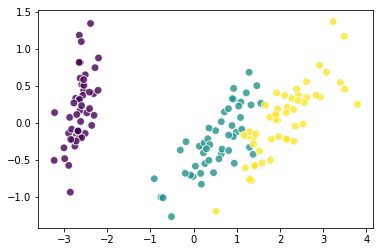

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets


iris = datasets.load_iris()

rpca_2c = PCA(svd_solver='randomized')
    
X_rpca_2c = rpca_2c.fit_transform(iris.data)
plt.scatter(X_rpca_2c[:,0], X_rpca_2c[:,1], c=iris.target,alpha=0.8, s=60, marker='o', edgecolors='white')

plt.show()


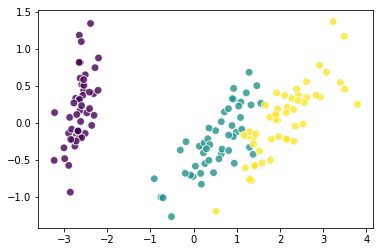

In [8]:
rpca_2c.explained_variance_ratio_.sum()


## Latent Factor Analysis (LFA)

- Latent factor analysis is another technique that helps you reduce the dimensionality of the dataset.

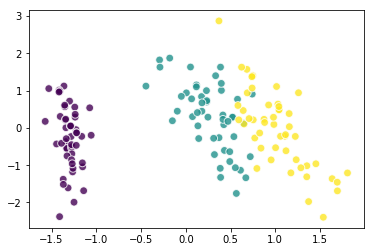

In [5]:
from sklearn.decomposition import FactorAnalysis

fact_2c = FactorAnalysis(n_components=2)
X_factor = fact_2c.fit_transform(iris.data)
plt.scatter(X_factor[:,0], X_factor[:,1], c=iris.target,alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()

## Linear Discriminant Analysis (LDA)

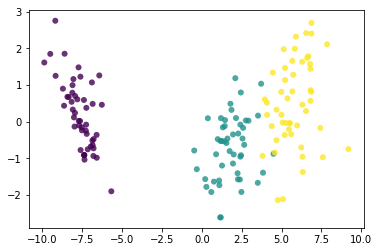

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_2c = LDA(n_components=2)
X_lda_2c = lda_2c.fit_transform(iris.data, iris.target)
plt.scatter(X_lda_2c[:,0], X_lda_2c[:,1], c=iris.target,alpha=0.8, edgecolors='none') 
plt.show()


## Latent Semantical Analysis (LSA)

- Typically, LSA is applied to text after it has been processed by TfidfVectorizer or CountVectorizer. Compared to PCA, it applies SVD to the input dataset (which is usually a sparse matrix), producing semantic sets of words usually associated with the same concept.

In [10]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

categories = ['sci.med', 'sci.space']
twenty_sci_news = fetch_20newsgroups(categories=categories)


tf_vect = TfidfVectorizer()
word_freq = tf_vect.fit_transform(twenty_sci_news.data)

tsvd_2c = TruncatedSVD(n_components=50)
tsvd_2c.fit(word_freq)

np.array(tf_vect.get_feature_names())[tsvd_2c.components_[20].argsort()[-10:][::-1]]


array(['jupiter', 'sq', 'zisfein', 'comet', 'of', 'jim', 'gehrels',
       'gene', 'omen', 'msb'], dtype='<U79')

## Kernel PCA

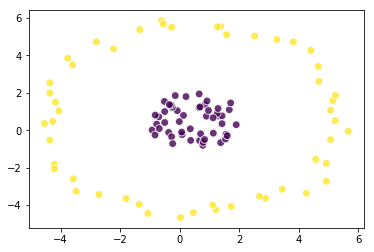

In [11]:
def circular_points (radius, N):
    return np.array([[np.cos(2*np.pi*t/N)*radius,np.sin(2*np.pi*t/N)*radius] for t in range(N)])

N_points = 50
fake_circular_data = np.vstack([circular_points(1.0, N_points),circular_points(5.0, N_points)])
fake_circular_data += np.random.rand(*fake_circular_data.shape)
fake_circular_target = np.array([0]*N_points + [1]*N_points)
plt.scatter(fake_circular_data[:,0], 
            fake_circular_data[:,1],
            c=fake_circular_target, 
            alpha=0.8, s=60, 
            marker='o',edgecolors='white')
plt.show()

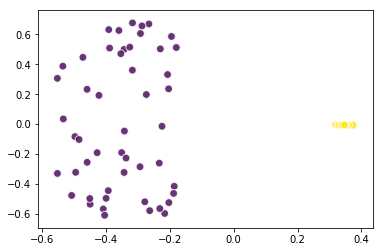

In [12]:
from sklearn.decomposition import KernelPCA
kpca_2c = KernelPCA(n_components=2, kernel='rbf')
X_kpca_2c = kpca_2c.fit_transform(fake_circular_data)
plt.scatter(X_kpca_2c[:,0], X_kpca_2c[:,1], c=fake_circular_target, alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()

## T-SNE

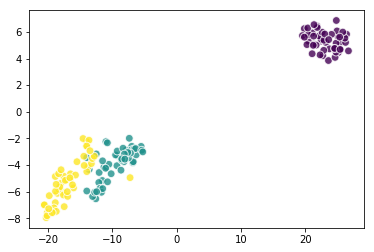

In [13]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
X_tsne = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()

## Restricted Boltzmann Machine (RBM)

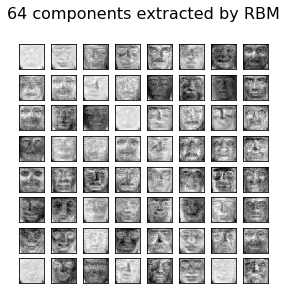

In [14]:
from sklearn import preprocessing
from sklearn.neural_network import BernoulliRBM

n_components = 64 # Try with 64, 100, 144
olivetti_faces = datasets.fetch_olivetti_faces()
X = preprocessing.binarize(preprocessing.scale(olivetti_faces.data.astype(float)), 0.5)
rbm = BernoulliRBM(n_components=n_components, learning_rate=0.01,n_iter=100)
rbm.fit(X)
plt.figure(figsize=(4.2, 4))

for i, comp in enumerate(rbm.components_):
    plt.subplot(int(np.sqrt(n_components+1)),
    int(np.sqrt(n_components+1)), i + 1)
    plt.imshow(comp.reshape((64, 64)), cmap=plt.cm.gray_r,
    interpolation='nearest')
    plt.xticks(()); plt.yticks(())

plt.suptitle(str(n_components) + ' components extracted by RBM',fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()